# Visualisations
This notebook demonstrates how different types of visualisations and customisations can be realised. The following packages are required:
* [Distributions](https://juliastats.github.io/Distributions.jl/stable/) (for everything related to probability distributions)
* [Plots](http://docs.juliaplots.org/latest/) (for the basic plotting needs)
* [LaTeXStrings](https://github.com/stevengj/LaTeXStrings.jl) (for LaTeX-style text in plots)
* [StatsPlots](https://github.com/JuliaPlots/StatsPlots.jl) (drop-in for Plots, focused on statistical plots e.g. histograms, boxplots etc.)
* [Measures](https://github.com/JuliaGraphics/Measures.jl) (for specific measurements e.g. mm, px etc.)
* [Dates](https://docs.julialang.org/en/v1/stdlib/Dates/index.html) (for datetime functionality)

For an in-depth overview of everything that is possible, please refer to the package  documentation. The illustrations below are intented to show the most common tasks and are by no means exhaustive.

In [144]:
using Distributions
using LaTeXStrings
using Plots
using StatsPlots
using Measures
using Dates
using JLD

## Basics

Remark: for data storage and access, you could use the [JLD package](https://github.com/JuliaIO/JLD.jl) (or even the [JLD2 package](https://github.com/JuliaIO/JLD2.jl)). E.g.
```Julia
x = [1,2]
y = Dict("a"=>20, "b"=>30)
# store values
save("mydatadump.jld", "var1", x, "var2", y)
# load specific value
z = load("mydatadump.jld", "var1")
# verify equality
@assert all(z .== x)
```

### Example
We illustrate the most simple of plots (straight line) and show several options that can be useful for basic plotting.

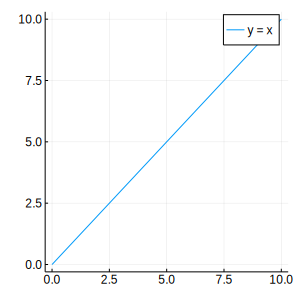

In [10]:
x = range(0,stop=10)
plot(x,x,size=(300,300),label="y = x")

Markers can be added by specifying them. Refer to the documentation for all possible options.

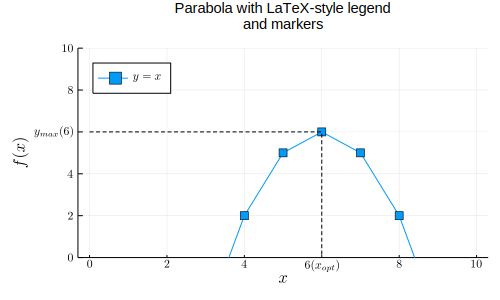

In [11]:
plot(x,-(x .- 6).^2 .+ 6,size=(500,300), label=L"y=x",legend=:topleft, marker=:square)
plot!([0, 6, 6],[6, 6, 0],label="",linestyle=:dash,linecolor=:black)   # add another series to same figure (not shown in legend)
title!("Parabola with LaTeX-style legend\n and markers",titlefontsize=10)
xlabel!(L"x")
ylabel!(L"f(x)")
# customising the axis ticks
yticks!([0, 2, 4, 6, 8, 10],[L"0", L"2", L"4", L"y_{max} (6)", L"8", L"10"])
xticks!(range(0,maximum(x),step=2),[L"0", L"2", L"4", L"6 (x_{opt})", L"8", L"10"])
# customizing the limits
ylims!(0,10)

If you want only a point cloud, a scatter plot might be more appropriate:

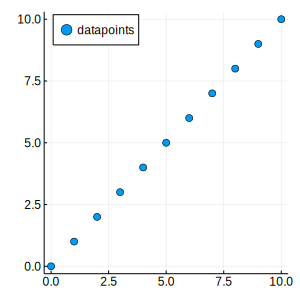

In [12]:
scatter(x,x,label="datapoints",legend=:topleft,size=(300,300))

Other types of plots are possibly suited as well

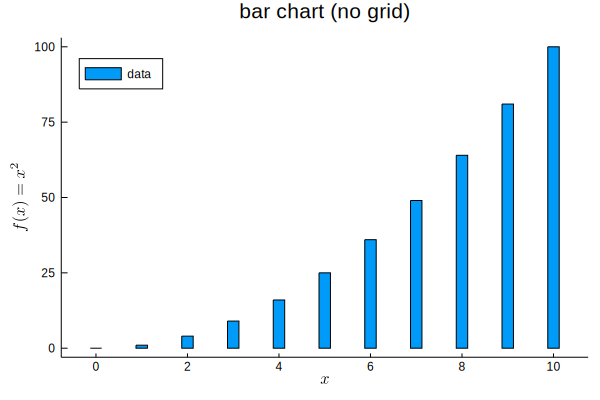

In [13]:
Plots.bar(x,x.^2,orientation=:v,label="data",legend=:topleft,bar_width=0.25,grid=false)
xticks!(range(0,maximum(x),step=2))
xlabel!(L"x")
ylabel!(L"f(x)=x^2")
title!("bar chart (no grid)")

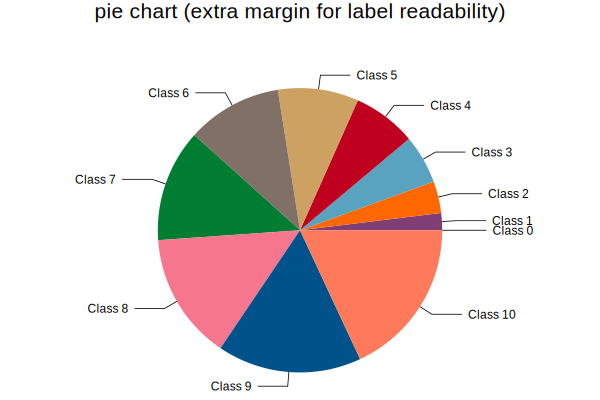

In [14]:
Plots.pie(["Class $(i)" for i in x],x,bottom_margin=5mm)
title!("pie chart (extra margin for label readability)")

Sometimes you might want to change the direction of an axis. The example below shows how this can be done. The y-axis is done in a similar way. Using simply `flip` inverts both axes.

When passing a vector of the same length of the data as argument to markersize, you can give each marker a specific size. The same goes for fill and color options.

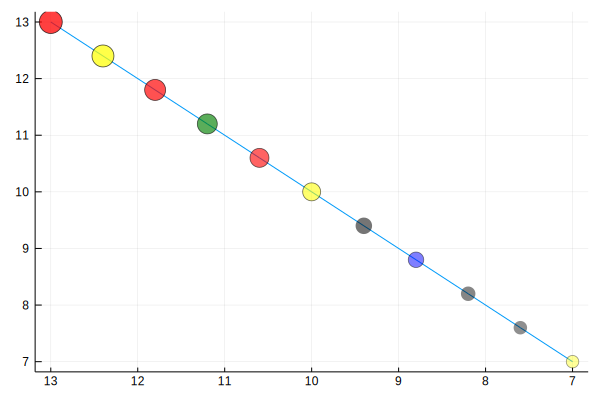

In [50]:
plot(x,x,xflip=true, label=nothing,
    marker=:circle,
    markersize=x, 
    markeralpha = 3*x ./4  ./ maximum(x),
    markercolor = rand([:blue, :red, :yellow, :green, :black],length(x))
)

### Example  - subplots
In some cases, it is wishful to show multiple graphs on the same figure. This can be done either by a simple rectangular layout, or following a more advanced lay-out (seen below).

When setting options after the global plot, they will be applied to all subplots. Below this is used to have the same scale on the y-axis in both subplots.

1. Side-by-side lay-out:


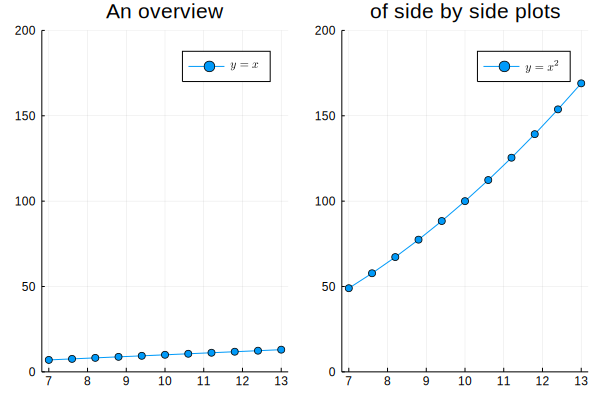

In [51]:
p1 = plot(x,x,label=L"y=x",marker=:circle)
# You can also use a
p2 = plot(x, x.^2,label=L"y=x^2",marker=:circle)
plot(p1,p2,layout=(1,2),title=["An overview" "of side by side plots"])
ylims!(0, 200)

2. More advanced layouts:

    These are created with the `@layout` macro. The lay-out should be seen as a multidimensional array. Specific layouts can be obtained by using the curly brackets and specifying the desired dimensions for width and height. The example below creates a plot with three subplots divided over two rows. In the first row, p1 gets 30% of the total width and p2 gets the remaing 70%.
    
    Notice how we can pass the yscale (and most other) arguments as an argument to subplots that required similar scales.


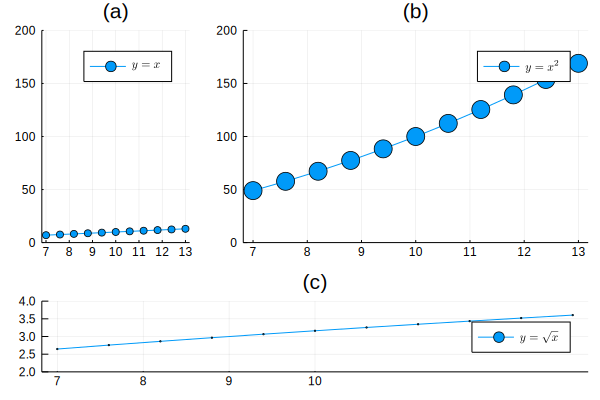

In [58]:
sharedylims = (0,200)
p1 = plot(x,x,label=L"y=x",marker=:circle, ylims=sharedylims)
p2 = plot(x, x.^2,label=L"y=x^2",marker=:circle,markersize=10, ylims=sharedylims)
p3 = plot(x, x.^(1/2),label=L"y=\sqrt{x}",marker=:circle,markersize=1,ylims=(2,4))
xticks!(range(0,stop=10))
l = @layout [ [a{0.3w} b{0.7w}]
               c{0.25h}]
p = plot(p1,p2,p3,layout=l,title=["(a)" "(b)" "(c)"])

### Example - Storing the result for a report
Sometimes, you want to export an illustration for use in a publication. Several file formats are available, but file format compatibility depends on the backend that is being used.

```Julia
savefig(p,"mysubplot.pdf") # saves as pdf
savefig(p,"mysubplot.png") # saves as png
```

### Example - Working with logarithmic scales
For some applications, representing the information on a logarithmic scale gives a better overview of what is happening. Remark: if there is zero or negative data in the vector you are trying to plot, this will not work.

Consider for instance the successive approximations of a root with Newton's method: 

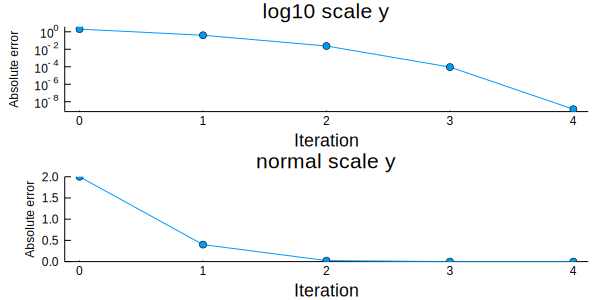

In [60]:
f = x -> x.^2 .- 9
g = x -> x - f(x) ./ (2 .* x)
x0 = [5.0]
for i in 1:4
    push!(x0,g(x0[end]))
end

# note the usage of `xticks!` & `xlabel` to give both graphs the same layout with only one line
plot(plot(range(0,stop=length(x0)-1),abs.(x0 .- 3),yscale=:log10,marker=:circle),
     plot(range(0,stop=length(x0)-1),abs.(x0 .- 3),ylims=(0,2),marker=:circle),
     layout=(2,1),
     title=["log10 scale y" "normal scale y"],
     size=(600,300)
     )

plot!(grid=false,legend=false)
xticks!(range(0, stop=length(x0)-1))
ylabel!("Absolute error",yguidefont=8)
xlabel!("Iteration",xguidefont=12)

### Example - Using date/time in plots
When working with discrete event simulation, we often study the behavior in function of the time. Below is an illustration of using date/time in plots.

Suppose we want to represent a daily measurement. For readability, we desire to have ticks on the x-axis every n days.

Notice the extra instruction `bottom_margin=7mm` in the final plot. This offset is required to avoid cutting off part of the x-axis labels.

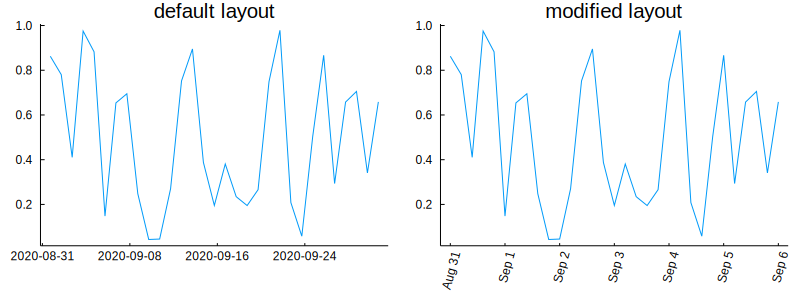

In [72]:
x = now(): Day(1) : now() + Month(1)
y = rand(length(x))

n = 5
p1 = plot(x,y,title="default layout",grid=false,legend=false)
p2 = plot(x,y,title="modified layout",xrotation=75,grid=false,legend=false)

# specifying the tick format (cf. documentation)
datexticks = [Dates.value(mom) for mom in x[1:n:end]]
datexticklabels = Dates.format.(x,"u d")
xticks!(datexticks,datexticklabels,tickfonthalign=:center)

# final plot
plot(p1,p2,size=(800,300),bottom_margin=7mm)


### Example
Suppose we have a measurement that should follow a multinomial normal distribution: $ X \sim N(\bar{\mu},\Sigma)$, i.e. a measurement in a two-dimensional space. We want to represent this graphically. Severel options could be considered: a 3D-plot, a heatmap, a contour plot.

In [118]:
μ₁ = 10; μ₂ = 20; μ = [μ₁, μ₂]  # mean matrix
Σ = [1.0 0;0 3];                # covariance matrix (i.e. no correlation between the variables)
d = Distributions.MvNormal(μ,Σ) # multivariate normal distribution

# make a grid
ns = 3
x = range(μ₁ - ns*Σ[1,1], stop=μ₁ + ns*Σ[1,1],length=11)
y = range(μ₂ - ns*Σ[2,2], stop=μ₂ + ns*Σ[2,2],length=11)

# gridpoints (permutation in order to be compatible with `pdf`)
g = permutedims([repeat(x,length(y))  repeat(y,inner=length(x))])

# PDF values
z = pdf(d,g);

Below you can see a 3D point cloud (with and without a color scale for better interpretation of the data).

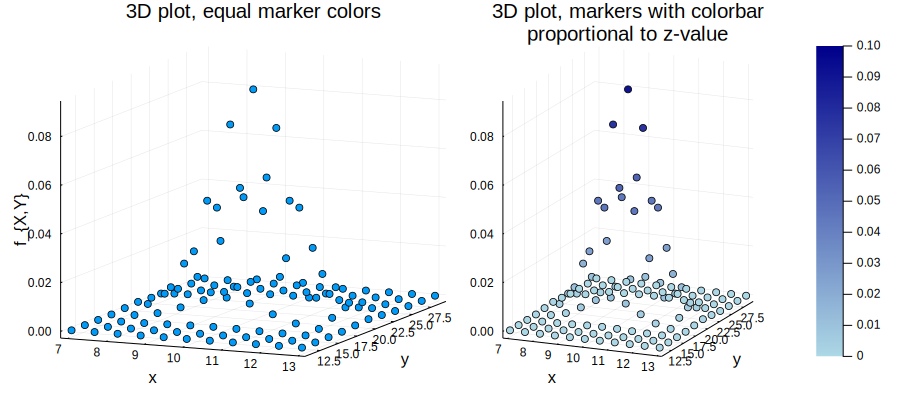

In [119]:
plot(Plots.scatter3d(g[1,:],g[2,:],z,
                     legend=false,title="3D plot, equal marker colors",
                     xlabel="x",ylabel="y",zlabel="f_{X,Y}"),
     Plots.scatter3d(g[1,:],g[2,:],z,marker_z=z,
                     legend=false,title="3D plot, markers with colorbar\n proportional to z-value",
                     xlabel="x",ylabel="y",cbar=true,clim=(0,0.1),colorbar_title="",color=:blues),
     size=(900,400))

Another option would be to use a countour plot:

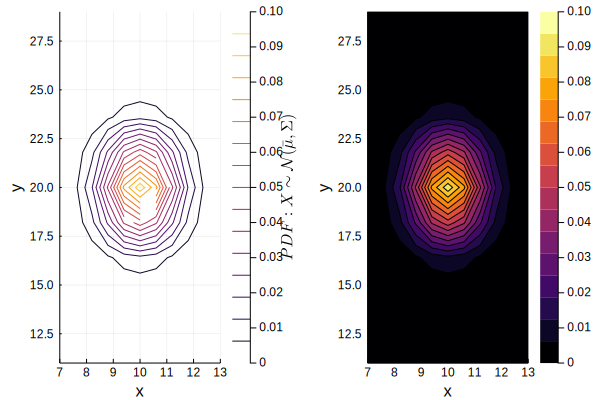

In [120]:
p1 = Plots.contour(x,y,z,clims=(0,0.1),color=:inferno,xlabel="x",ylabel="y",
                   colorbar_title="\$ PDF: X \\sim \\mathcal{N}(\\bar{\\mu},\\Sigma) \$")
p2 = Plots.contour(x,y,z,fill=true,color=:inferno,xlabel="x",ylabel="y",
                   clims=(0,0.1))
plot(p1,p2)

Or a heatmap:

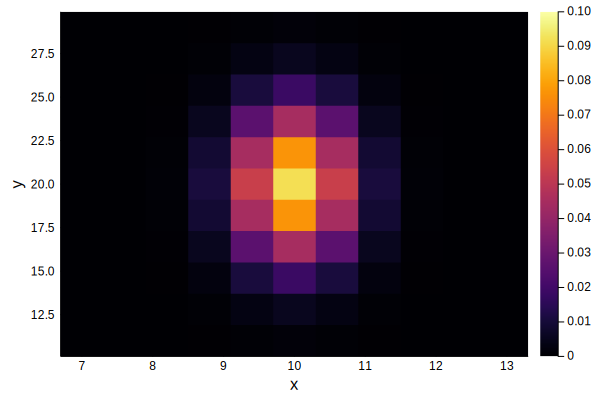

In [140]:
Plots.heatmap(x,y,reshape(z,length(y), length(x)),clims=(0,0.1),xlabel="x",ylabel="y", color=:inferno)

Or even a surface plot:

remark: that adding '_r' to an existing colorscale, flips the direction

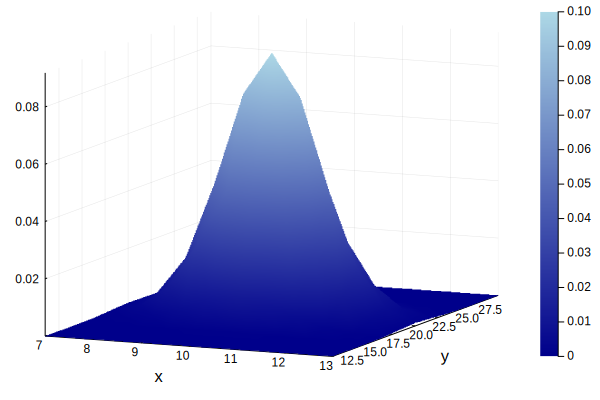

In [141]:
Plots.surface(x,y,z,xlabel="x",ylabel="y",clims=(0,0.1),color=:blues_r)

## Statistical plots
In the context of numerical simulations, it will be required to do some statistical exploitation of the generated data. A lot of specific statistical plotting recipes are grouped in the `StatsPlots` package.

### Example

We have a sample ($ X \sim \chi ^{2}_{k=3}$) that we want to visualize as a boxplot. The following keywords are available:
* `notch=false`: if a notch should be included in the box.
* `range=1.5`: multiple of the inter-quartile range that is used to determine outliers
* `whisker_width=:match`: width of the whiskers
* `outliers=true`: if outliers should be show on the plot
* `bar_width=0.8`: width of the boxplot

Most keywords that work with Plots also work here (as illustrated below)

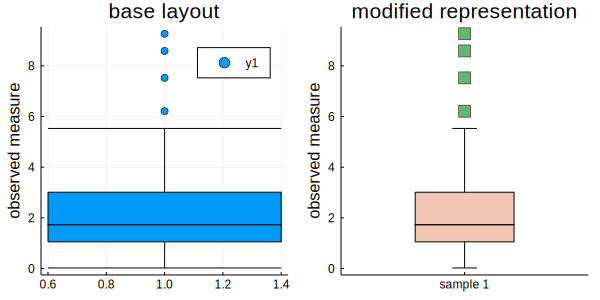

In [148]:
k = 3; n = 40
d = Distributions.Chisq(k)
x = rand(d,n)

plot(StatsPlots.boxplot(x,ylabel="observed measure",title="base layout"),
     StatsPlots.boxplot(x,ylabel="observed measure",legend=false,grid=false,
                        whisker_width = 0.2,
                        title="modified representation",
                        xlims=(0,2),xticks=(1,["sample 1"]),
                        fillalpha=0.4,fillcolor=2,       # specifying different color for box and marker
                        markershape=:square,markercolor=3,markersize=6,markeralpha=0.8
                       ),
     size=(600,300))

### Example
We want to:
- visualize a probality distribution, both the PDF and the CDF, e.g $X\sim N \left( 10,2  \right)$.
- highlight some accents (annotations)
- gain additional understanding of the concept type II errors. For $\alpha = 0.025$ and for the following $H_0: E[X]<=10,H_1: E[X]>10$ and we are interested in the type II error if $E[X]=16$

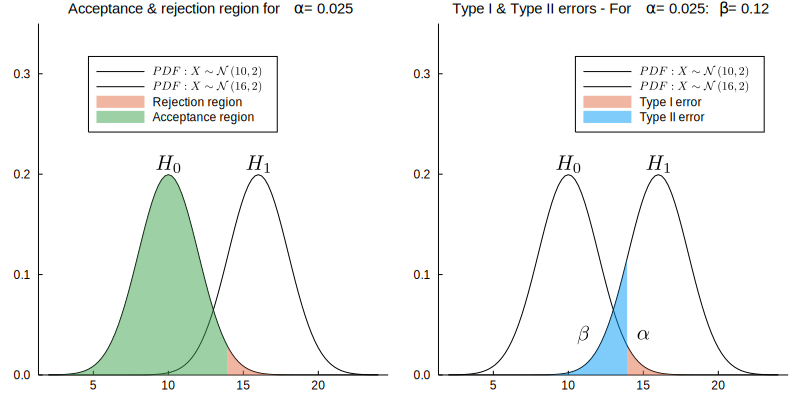

In [149]:
μ = 10; σ = 2
μᵣ = 16
d₀ = Normal(μ,σ)
d₁ = Normal(μᵣ,σ)
α = 0.025

x = range(μ - 4σ,stop=μ + 7σ,length=100)
x_crit = quantile(d₀,1-α)
x_reject = range(x_crit,stop=maximum(x),length=100)
x_accept = range(minimum(x),stop=maximum(x_crit),length=100)

β = pdf(d₁,x_crit)
p1 = plot(x, pdf.(d₀,x),label="\$ PDF: X  \\sim \\mathcal{N} \\left( $μ, $σ \\right)   \$",legend=:top,color=:black,grid=false) # first PDF
     plot!(x, pdf.(d₁,x),label="\$ PDF: X  \\sim \\mathcal{N} \\left( $μᵣ, $σ \\right)   \$",color=:black) # first PDF
     plot!(x_reject,pdf.(d₀,x_reject),fillrange=0,fillalpha=0.5,color=2,label="Rejection region",linealpha=0 ) # fill rejection region
     plot!(x_accept,pdf.(d₀,x_accept),fillrange=0,fillalpha=0.5,color=3,label="Acceptance region",linealpha=0 ) # fill rejection region
     annotate!(μ, 0.21,"\$ H_0 \$")
     annotate!(μᵣ, 0.21,"\$ H_1 \$")
     title!("Acceptance & rejection region for \\alpha= $α ",titlefontsize=10)
     ylims!(0,0.35)

p2 = plot(x, pdf.(d₀,x),label="\$ PDF: X  \\sim \\mathcal{N} \\left( $μ, $σ \\right)   \$",color=:black,grid=false) # first PDF
     plot!(x, pdf.(d₁,x),label="\$ PDF: X  \\sim \\mathcal{N} \\left( $μᵣ, $σ \\right)   \$",color=:black) # first PDF
     plot!(x_reject,pdf.(d₀,x_reject),fillrange=0,fillalpha=0.5,color=2,label="Type I error",linealpha=0 ) # fill alpha region
     plot!(x_accept,pdf.(d₁,x_accept),fillrange=0,fillalpha=0.5,color=1,label="Type II error",linealpha=0 ) # fill beta region
     annotate!(μ, 0.21,"\$ H_0 \$")
     annotate!(μᵣ, 0.21,"\$ H_1 \$")
     annotate!(11, 0.04,"\$ \\beta \$")
     annotate!(15, 0.04,"\$ \\alpha \$")
     title!("Type I & Type II errors - For \\alpha = $α: \\beta = $(round(β,digits=2))",titlefontsize=10)
     ylims!(0,0.35)
plot(p1,p2,size=(800,400))  

# Example
We have data and we want to:
* show the emperical and theoretical PDF 
* show the emperical and theoretical CDF 
* get an idea to what extent the data matches a proposed distribution by means of a PP/QQ plot

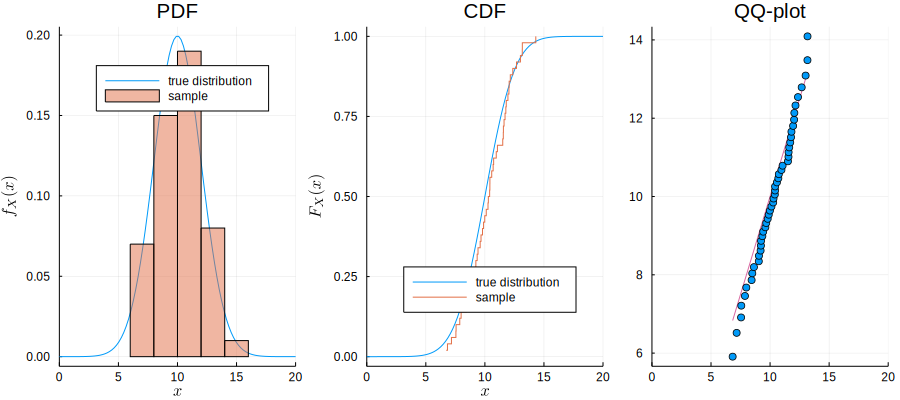

In [150]:
μ = 10; σ=2; n = 50
d = Distributions.Normal(μ,σ)
x = sort(rand(d,n))
x_d = range(μ - 5σ,stop=μ + 5σ,length=100)

p1 = plot(x_d, pdf.(d,x_d),label="true distribution",ylabel="\$ f_X(x) \$",xlabel="\$ x \$",title="PDF")
     histogram!(x,normalize=true,label="sample",fillalpha=0.5,legend=:best)
p2 = plot(x_d, cdf.(d,x_d),label="true distribution",ylabel="\$ F_X(x) \$",xlabel="\$ x \$",title="CDF")
     plot!(x,range(1,stop=length(x))/length(x),legend=:bottomright,linetype=:step,label="sample")
p3 = StatsPlots.qqplot(x,d,title="QQ-plot")
plot(p1,p2,p3,size=(900,400),layout=(1,3),xlims=(μ - 5σ,μ + 5σ))


### Example

We have generated some data and want to make 
* a histogram representation (counts).
* a PDF estimation (percentages).
* a [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

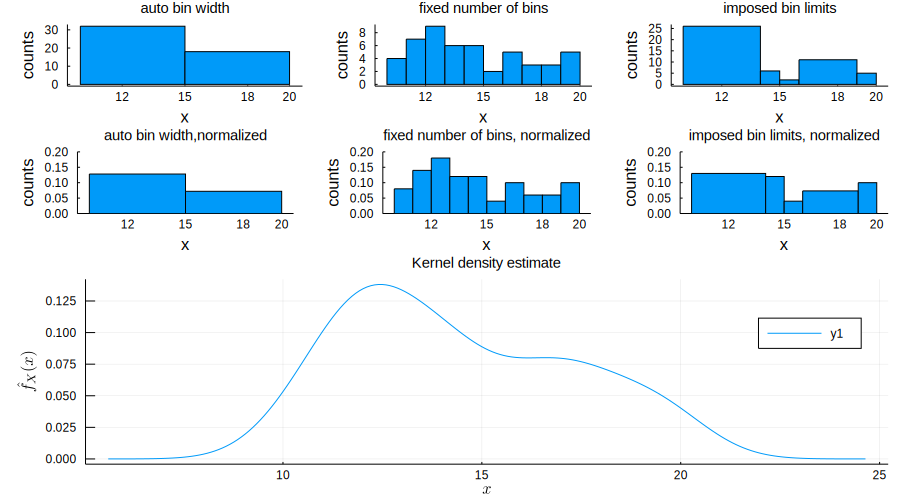

In [156]:
d = Distributions.Uniform(10,20)
x = rand(d,50)

p1 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,title="auto bin width")
p2 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,bins=10,title="fixed number of bins")
p3 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,bins=[10, 14, 14, 15, 16, 19, 20],title="imposed bin limits")
p4 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,title="auto bin width,normalized",normalize=true,ylims=(0,0.2))
p5 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,bins=10,title="fixed number of bins, normalized", 
                          normalize=true,ylims=(0,0.2))
p6 = StatsPlots.histogram(x,grid=false,xlabel="x",ylabel="counts",legend=false,bins=[10, 14, 14, 15, 16, 19, 20],
                            title="imposed bin limits, normalized", normalize=true,ylims=(0,0.2))
p7 = StatsPlots.density(x,title="Kernel density estimate",ylabel="\$ \\hat{f}_X(x) \$",xlabel="\$ x \$")

l = @layout [ [a b c]
              [d e f]
              g{0.6h}]
plot(p1,p2,p3,p4,p5,p6,p7,layout=l,size=(900,500))
plot!(titlefontsize=10, left_margin=5mm)

### Example - different representations of a sample
We generate random data $x\sim N \left( \mu,\sigma  \right)$ with $\mu = x, \sigma=\sqrt{x}$ for $x \in [2,10]$ and use several methods of representation.

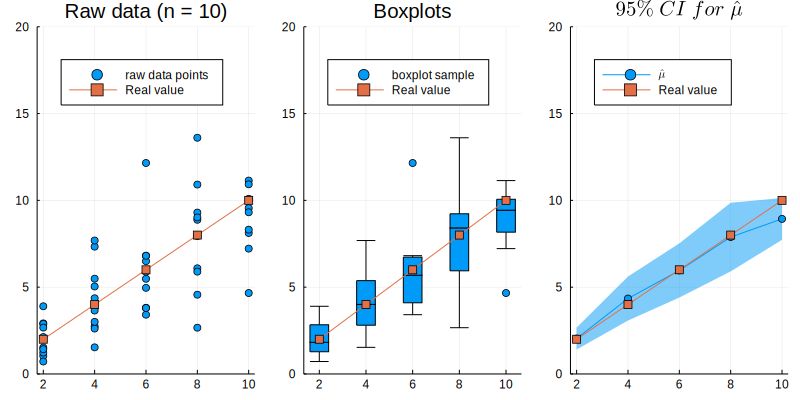

In [162]:
# Basic statistics and sampling
α = 0.05                     # type 1 error
n = 10                       # sample length
x = range(2,stop=10,step=2)  #
d = Normal.(x,sqrt.(x))      # array of distributions
y = [rand(k,n) for k in d]   # actual sample of length n for each distribution
mu_hat = mean.(y)            # 
sigma =  std.(y)             #

# Making a classic plot (raw data points)
p1 = plot(repeat(x,inner=n),collect(Iterators.flatten(y)),
          marker=:circle,linealpha=0,label="raw data points",legend=:topleft)
plot!(x,x,marker=:square,label="Real value")
title!("Raw data (n = $(n))")
ylims!(0,20)

# Making a boxplot plot
p2 = boxplot(repeat(x,inner=n),collect(Iterators.flatten(y)),label="boxplot sample")
plot!(x,x,marker=:square,label="Real value")
plot!(legend=:topleft)
title!("Boxplots")
ylims!(0,20)

# Making a ribbon plot (if normality is OK)
upper = quantile(Normal(),1 - α/2) * sigma / sqrt(n)
lower = upper
p3 = plot(x,mu_hat,marker=:circle,ribbon=(lower,upper),label=L"\hat{\mu}")
plot!(x,x,marker=:square,label="Real value")
plot!(legend=:topleft)
title!(L"95\% \; CI \;for\; \hat{\mu}")
ylims!(0,20)

plot(p1,p2,p3,layout=(1,3),size=(800,400))

### Some Background - colors
The colors that will be used are associated with a palette, i.e. the way your plots will look in general (this includes background, frames, color palette etc. The default value is `:default` and the associated colorset has 17 colors. You can list these by using `palette(:default)`. When making a plot, you can also force to use color N° x by explicitly writing it as in integer. e.g `plot(x,color=1)`. A lot of colors have their own alias e.g. `:blue`

Should you plot more than 17 data series, the list starts again at the beginning. Should you require more for some reason, let's say 20, you can use `get_color_palette(:auto, plot_color(:default),20)`. 




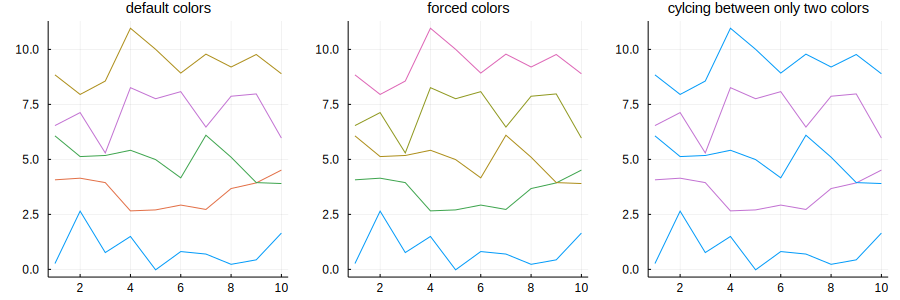

In [164]:
μ = range(1,step=2,length=5)
d = Normal.(μ,1)
x = [rand(dist,10) for dist in d]
p1 = plot(x,legend=false)
title!("Default colors")
p2 = plot(x,color=[1 3 5 10 15],legend=false)
title!("Forced colors")

p = get_color_palette(:auto, plot_color(:white),20)
p3 = plot(x,color=[p[1] p[4]],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(900,300),title=(["default colors" "forced colors"  "cylcing between only two colors"]),titlefontsize=10)

## Tasks

* Generate a histogram representing the birthdays of your colleagues. Also make a kernel density estimation and show this as a transparant overlay on the same figure. Save as pdf and compare with the other language group.
* ...